## Data Storytelling demo on animal bites

## Data Storytelling 
The dataset taken from [Kaggle animal bites](https://www.kaggle.com/rtatman/animal-bites).

In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

<b> Inspiration</b>
* Which animals are most likely to bite humans?
* Are some dog breeds more likely to bite?
* What factors are most strongly associated with a positive rabies ID?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
animal_bite_df = pd.read_csv('Health_AnimalBites.csv')
animal_bite_df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [3]:
animal_bite_df.tail()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN
9002,2017-09-07 00:00:00,DOG,BOXER,NaN,BRN BLK,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


In [4]:
animal_bite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [5]:
#count of null values per column
animal_bite_df.isnull().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

## Explanation  of  data contents
Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

In [6]:
animal_bite_df.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

- <b>bite_date:</b>  The date the bite occurred
- <b> SpeciesIDDesc: </b>  The species of animal that did the biting
- <b> BreedIDDesc: </b>  Breed (if known)
- <b> GenderIDDesc: </b> Gender (of the animal)
- <b> color: </b> color of the animal
- <b> vaccination_yrs:</b>  how many years had passed since the last vaccination
- <b> vaccination_date: </b> the date of the last vaccination
- <b> victim_zip: </b>  the zipcode of the victim
- <b> AdvIssuedYNDesc: </b>  whether advice was issued
- <b> WhereBittenIDDesc: </b>  Where on the body the victim was bitten
- <b> quarantine_date: </b> whether the animal was quarantined
- <b> DispositionIDDesc: </b>  whether the animal was released from quarantine
- <b> headsentdate: </b>  the date the animal’s head was sent to the lab
- <b> release_date: </b> the date the animal was released
- <b> ResultsIDDesc: </b>  results from lab tests (for rabies)

In [7]:
print(animal_bite_df.SpeciesIDDesc.nunique())
print(animal_bite_df.SpeciesIDDesc.unique())

9
['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' nan 'HORSE' 'SKUNK' 'FERRET']


In [8]:
print(animal_bite_df.GenderIDDesc.nunique()) #Gender values
print(animal_bite_df.GenderIDDesc.unique())

3
['FEMALE' 'UNKNOWN' 'MALE' nan]


In [9]:
print(animal_bite_df.BreedIDDesc.nunique())
print(animal_bite_df.BreedIDDesc.unique())

101
[nan 'GERM SHEPHERD' 'DACHSHUND' 'PIT BULL' 'SHIH TZU' 'COCKER SPAINEL'
 'CHICHAUHUA' 'BEAGLE' 'CHOW CHOW' 'OTHER' 'BOXER' 'AAUST. TERR.'
 'GOLD RETRIEVER' 'LABRADOR RETRIV' 'BULLMASTIFF' 'BORDER COLLIE'
 'POMERANIAN' 'YORKSHIRE TERRIER' 'GREYHOUND' 'ROTTWEILER'
 'AMER. BULL DOG' 'DALMATIAN' 'HUSKY' 'BULL DOG' 'MASTIF'
 'GREAT PYRENEESE' 'GREAT DANE' 'POODLE' 'SIBERAN HUSKY' 'WEIMARANER'
 'CORGI' 'BOSTON TERRIER' 'SCHNAUZER' 'BASSET HOUND' 'MIN PIN'
 'WELSH CORGI' 'AM BULLDOG' 'SAMOYED' 'MALTASE' 'AKITA' 'SHELTIE'
 'LHASA APSO' 'SAINT BERNARD' 'AIREDALE TER.' 'AM. ESKIMO' 'BICHON FRISE'
 'PUG' 'DOBERMAN' 'DOTSON' 'NEW FOUNDLAND' 'BERNESEN MT.' 'HAVANESE'
 'ENGLISH SETTER' 'SHAR-PEI' 'COCKAPOO' 'OLD ENG SHP DOG' 'WESTIE'
 'BOUVIER' 'RAT TERRIER' 'SHEEP DOG' 'HEELER' 'PEKINGESE'
 'FOX TERRIER MIX' 'ENGLISH BULLDOG' 'BORDER COLLIE M' 'BASANJI' 'PYRENES'
 'BLOOD HOUND' 'COLLIE' 'ALASK. MALAMUTE' 'BRITNEY SPANIEL' 'BICHON FRESE'
 'FOX TERRIER' 'BLUE HEELER' 'CATAHOULA' 'CANE CORSO' 'IRI

In [10]:
species = animal_bite_df.SpeciesIDDesc
species = species.dropna() #drop nan values in species feature
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


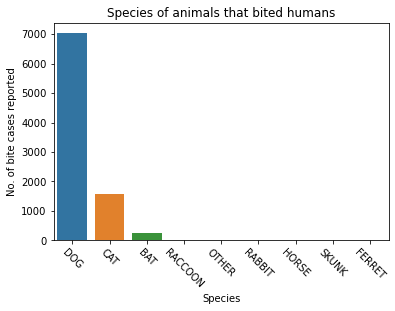

In [11]:
sns.countplot(x="SpeciesIDDesc", data= animal_bite_df);
plt.title('Species of animals that bited humans')
plt.xlabel('Species')
plt.ylabel('No. of bite cases reported')
plt.xticks(rotation=-45)

plt.show()

Dog has bite most of the time.

In [12]:
dogs_df = animal_bite_df[animal_bite_df["SpeciesIDDesc"] == "DOG"]
print (len(dogs_df))
# df.groupby('BreedIDDesc').count()
dogs_df['BreedIDDesc'].value_counts().idxmax()

7029


'PIT BULL'

7209 species of dog has bitten and being the  Pit Bull most of the time has bitten. 

MALE       3832
FEMALE     2016
UNKNOWN     629
Name: GenderIDDesc, dtype: int64


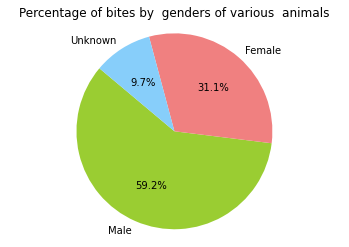

In [13]:
genderCount = animal_bite_df["GenderIDDesc"].value_counts()
print(genderCount)

# Now plot this in a pie chart
labels = 'Male', 'Female', 'Unknown'
counts = [3832, 2016, 629]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Percentage of bites by  genders of various  animals")
plt.show()

Male (59.2%) animal has bitten most of the time

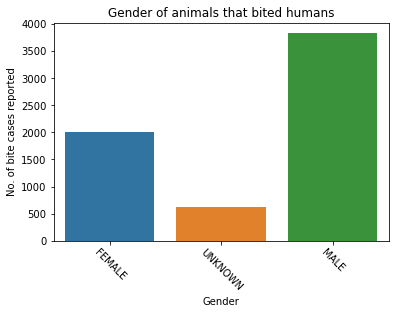

In [14]:
sns.countplot(x="GenderIDDesc", data= animal_bite_df);
plt.title('Gender of animals that bited humans')
plt.xlabel('Gender')
plt.ylabel('No. of bite cases reported')
plt.xticks(rotation=-45)

plt.show()

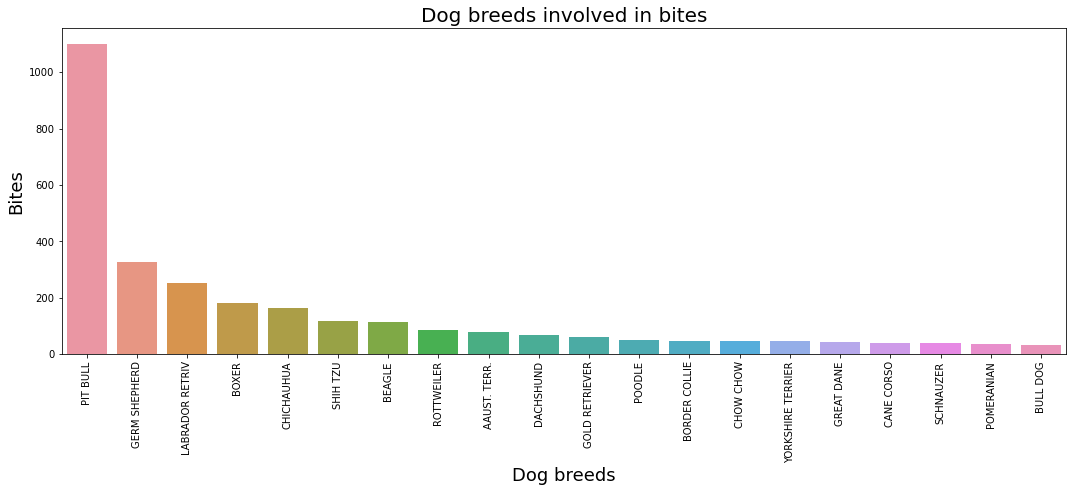

In [15]:
dog_breeds = animal_bite_df.where(animal_bite_df['SpeciesIDDesc'] == "DOG")
plt.figure(figsize=(18,6))
sns.countplot(dog_breeds['BreedIDDesc'],order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:20].index)
plt.title("Dog breeds involved in bites", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

Most breed of dog that has caused havoc is pit buul.

In [16]:
animal_bite_df['WhereBittenIDDesc'].value_counts()

BODY       6213
HEAD       1244
UNKNOWN     930
Name: WhereBittenIDDesc, dtype: int64

Body has bitten most of the time.

In [17]:
missing_values = animal_bite_df.isnull().sum()
print(missing_values)

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64


In [18]:
animal_bite_df['BreedIDDesc'].value_counts().iloc[:30]

PIT BULL             1102
GERM SHEPHERD         327
LABRADOR RETRIV       253
BOXER                 181
CHICHAUHUA            165
SHIH TZU              119
BEAGLE                116
ROTTWEILER             86
AAUST. TERR.           78
DACHSHUND              67
GOLD RETRIEVER         60
POODLE                 50
BORDER COLLIE          47
CHOW CHOW              46
YORKSHIRE TERRIER      46
GREAT DANE             43
CANE CORSO             40
SCHNAUZER              39
POMERANIAN             38
OTHER                  35
BULL DOG               34
HUSKY                  34
DOBERMAN               32
COCKER SPAINEL         30
BOSTON TERRIER         29
ENGLISH BULLDOG        28
MALTASE                28
AKITA                  28
MIN PIN                27
MASTIF                 27
Name: BreedIDDesc, dtype: int64

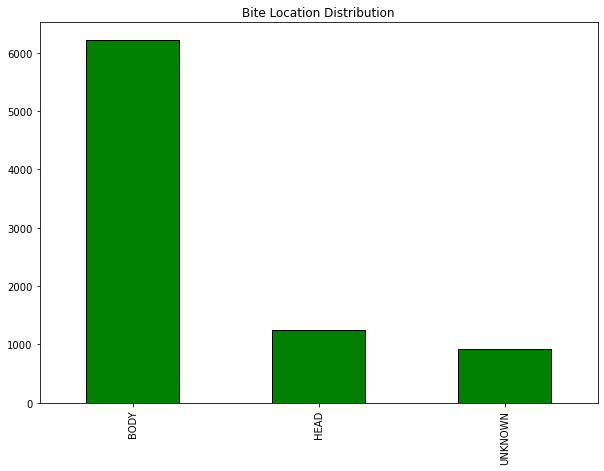

In [19]:
#plot bar chart of bite location distribution
location = animal_bite_df["WhereBittenIDDesc"]
plt.figure(figsize=(10 , 7))
location.value_counts().plot(
    kind="bar",
    title="Bite Location Distribution",
    color="green",
    edgecolor="black"
)
plt.show()

In [20]:
#!pip install pandas-profiling

In [21]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport

In [22]:
#animal_bite_profile_report=ProfileReport(animal_bite_df,title='Animal bite profile', html={'style':{'full_width':True}})

In [23]:
animal_bite_profile_report=ProfileReport(animal_bite_df,title='Animal bite profile')
animal_bite_profile_report